In [42]:
import requests
import json
import pandas as pd
import pandas_datareader as pdr

In [71]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CES0000000001'],"startyear":"2010", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

if json_data['status'] == 'REQUEST_NOT_PROCESSED':
    x = pdr.DataReader('BLSE/CES0000000001', data_source='quandl', start='1939-01-31',api_key='rz7xyB845FPbzgMAwyg-')
    
else:
    for series in json_data['Results']['series']:
        l = list()
        for item in series['data']:
            year = item['year']
            period = item['periodName']
            date = year+'-'+period+'-'+'28'
            value = int(item['value'])
            l.append((date, value))

    # creating DataFrame
    x = pd.DataFrame(l, columns=["Date", "Value"])
    x['Date'] = pd.to_datetime(x['Date'])
    x.set_index(keys=['Date'], inplace=True)

x.sort_index(inplace=True)

# Creating change in value column
x['change'] = x['Value'].diff() * 1000

# Creating % change column.
x['% Change'] = x['Value'].pct_change() * 100

In [72]:
x

,Value,change,% Change
Date,,,
1939-01-31,29923.0,NaN,NaN
1939-02-28,30100.0,177000.0,0.591518
1939-03-31,30280.0,180000.0,0.598007
1939-04-30,30094.0,-186000.0,-0.614267
1939-05-31,30299.0,205000.0,0.681199
...,...,...,...
2020-02-29,152463.0,251000.0,0.164902
2020-03-31,151090.0,-1373000.0,-0.900546
2020-04-30,130303.0,-20787000.0,-13.758025


In [70]:
x.to_csv('nonFarm payroll (06-20).csv')

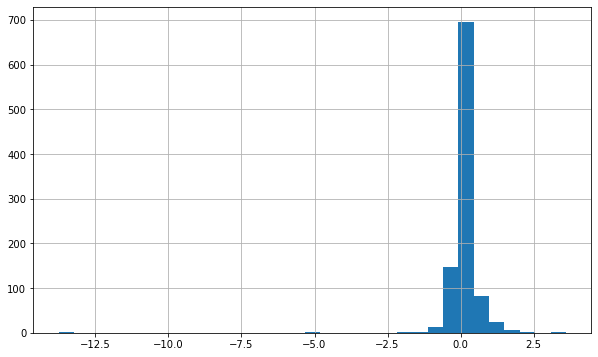

In [56]:
x['% Change'].hist(bins=33, figsize=(10, 6))